In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')
df.head(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,ACURA,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,ACURA,NSX,SUBCOMPACT,3.0,6,AS4,Z,13.6,9.2,11.6,24,267
8,2000,ACURA,NSX,SUBCOMPACT,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


In [4]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [5]:
dcf = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','HWY (L/100 km)','COMB (L/100 km)','COMB (mpg)','EMISSIONS']]
dcf.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,9.2,6.7,8.1,35,186
1,1.6,4,8.5,6.5,7.6,37,175
2,3.2,6,12.2,7.4,10.0,28,230
3,3.5,6,13.4,9.2,11.5,25,264
4,1.8,4,10.0,7.0,8.6,33,198


<Axes: >

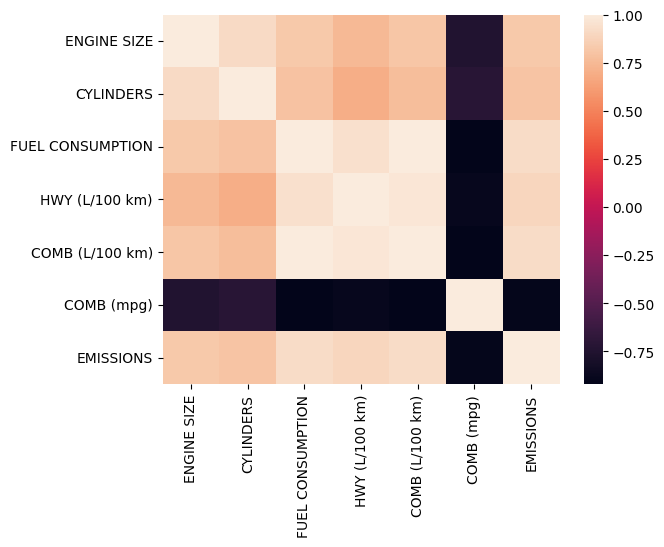

In [6]:
import seaborn as sns
corr_matrix = dcf.corr()
sns.heatmap(corr_matrix)

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = dcf[msk]
test = dcf[~msk]

In [40]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUEL CONSUMPTION','COMB (mpg)','COMB (L/100 km)','ENGINE SIZE','CYLINDERS','HWY (L/100 km)']])
train_y = np.asanyarray(train[['EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-6.83699275 -2.85147327 15.07430592  2.41681924  6.95599898  1.41372134]]
Intercept:  [187.65478282]


In [41]:
y_hat= regr.predict(test[['FUEL CONSUMPTION','COMB (mpg)','COMB (L/100 km)','ENGINE SIZE','CYLINDERS','HWY (L/100 km)']])
x = np.asanyarray(test[['FUEL CONSUMPTION','COMB (mpg)','COMB (L/100 km)','ENGINE SIZE','CYLINDERS','HWY (L/100 km)']])
y = np.asanyarray(test[['EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 391.90
Variance score: 0.89


C:\Users\91626\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
